In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [2]:
def flood_fill(img, origin):
    obj = []                                   # Lista com coordenadas do objeto
    visited = np.zeros(img.shape).astype(bool) # Matriz com pontos já visitados
    queue = deque()                            # Fila de pontos que ainda precisam ser visitados
    
    queue.append(origin)
    while queue:
        
        row, col = queue.popleft()
        if not visited[row, col]:
            obj.append((row, col))
            visited[(row, col)] = True

            # Define os quatro vizinhos
            up    = (row-1, col  )
            right = (row  , col+1)
            down  = (row+1, col )
            left  = (row  , col-1)

            # Adiciona cada vizinho na fila, contanto que se respeitem os limites 
            # da imagem, ainda não tenham sido visitados e tenham a intensidade da origem
            # Vizinha de cima
            if row != 0:
                if not visited[up] and img[up] == img[origin]:
                    queue.append(up)

            # Vizinho à direita
            if col != img.shape[1]-1:
                if not visited[right] and img[right] == img[origin]:
                    queue.append(right)

            # Vizinho de baixo
            if row != img.shape[0]-1:
                if not visited[down] and img[down] == img[origin]:
                    queue.append(down)

            # Vizinho à esquerda
            if col != 0:
                if not visited[left] and img[left] == img[origin]:
                    queue.append(left)
                    
    return obj

In [3]:
img = np.array([[0, 0, 0, 1],
                [0, 1, 1, 1],
                [0, 1, 1, 1],
                [0, 0, 1, 1]])

obj = flood_fill(img, (1, 1))
print(obj)

[(1, 1), (1, 2), (2, 1), (1, 3), (2, 2), (0, 3), (2, 3), (3, 2), (3, 3)]


In [4]:
print("Imagem Original: ")
print(img)

img2 = img.copy()
for point in obj:
    img2[point] = 2
    
print("Imagem após Flood Fill")
print(img2)

Imagem Original: 
[[0 0 0 1]
 [0 1 1 1]
 [0 1 1 1]
 [0 0 1 1]]
Imagem após Flood Fill
[[0 0 0 2]
 [0 2 2 2]
 [0 2 2 2]
 [0 0 2 2]]


In [25]:
img = plt.imread('componentes.tiff')

obj = flood_fill(img, (60,20))

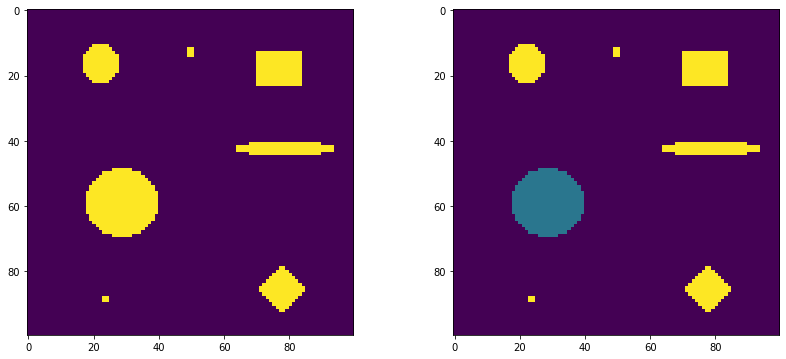

In [28]:
img_colored = img.copy()
for point in obj:
    img_colored[point] = 100
    
plt.figure(figsize=[14, 6])
plt.subplot(1, 2, 1)
plt.imshow(img, vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(img_colored, vmin=0, vmax=255)

In [29]:
img = plt.imread('blob.tiff')

obj = flood_fill(img, (25,25))

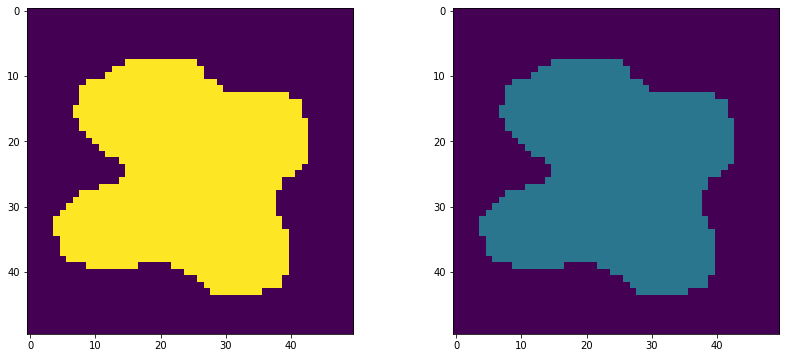

In [30]:
img_colored = img.copy()
for point in obj:
    img_colored[point] = 100
    
plt.figure(figsize=[14, 6])
plt.subplot(1, 2, 1)
plt.imshow(img, vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(img_colored, vmin=0, vmax=255)